# Machine Learning Boilerplate Workflow (KNN Example)

## Define Problem
We want to classify breast cancer tumors as malignant (1) or benign (0) based on medical features (mean radius, mean texture, mean perimeter, etc.). This is a supervised classification problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## EDA

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Shape of dataset:", X.shape)
print("Classes:", np.unique(y))
X.head()

Shape of dataset: (569, 30)
Classes: [0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

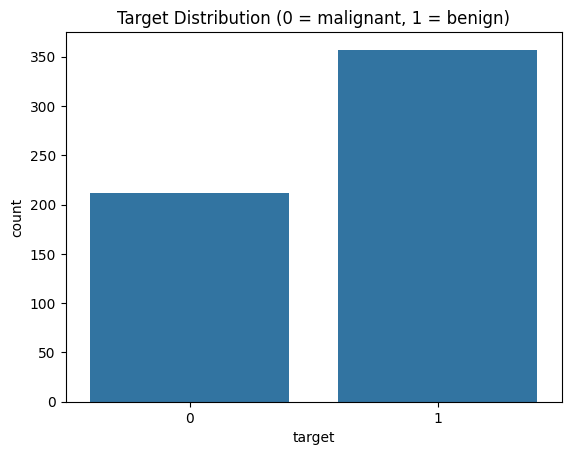

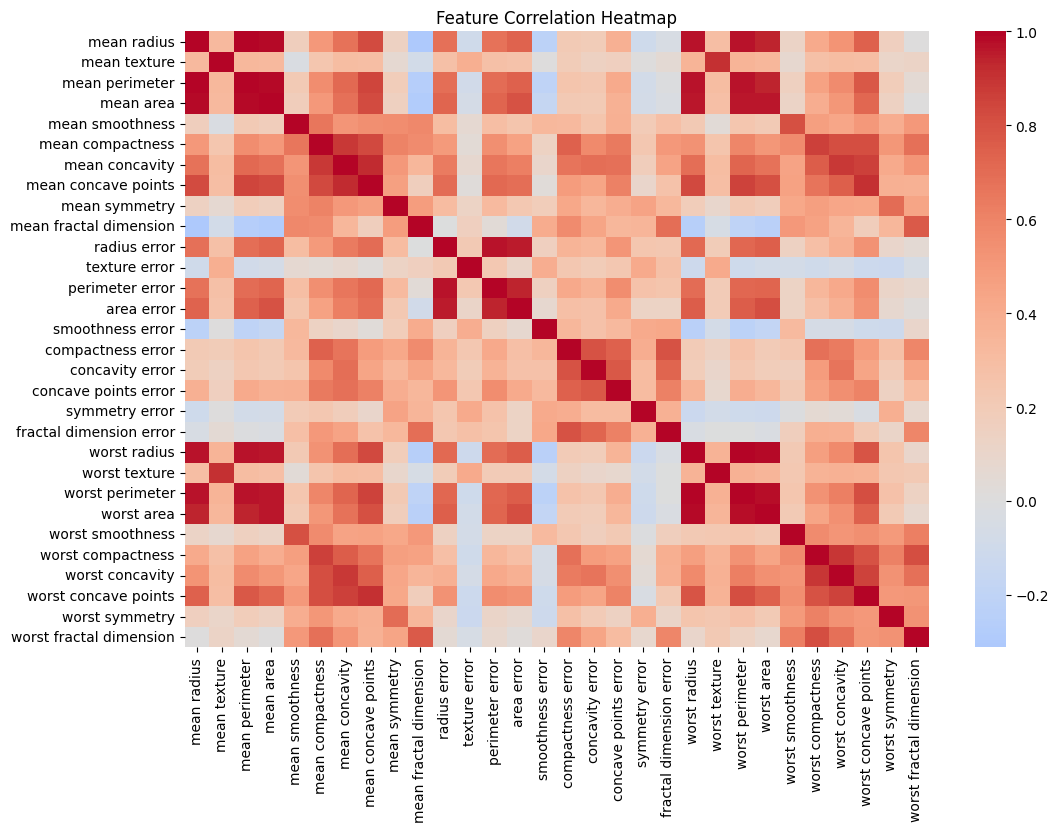

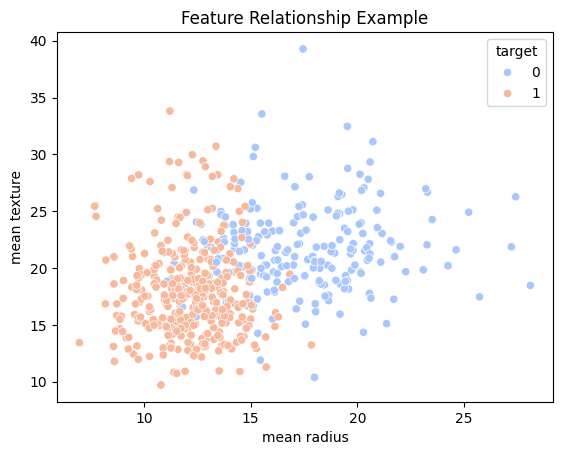

In [3]:
# Basic stats
print(X.describe())

# Target distribution
sns.countplot(x=y)
plt.title("Target Distribution (0 = malignant, 1 = benign)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot of two strong features
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y, palette="coolwarm")
plt.title("Feature Relationship Example")
plt.show()


### Explanation:

- KNN relies on distance metrics. Features with larger scales dominate → must standardize.
- Correlations help see redundancy.
- Scatterplots show if classes are separable.

## Data Preprocessing

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Model Training (Simple KNN)

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



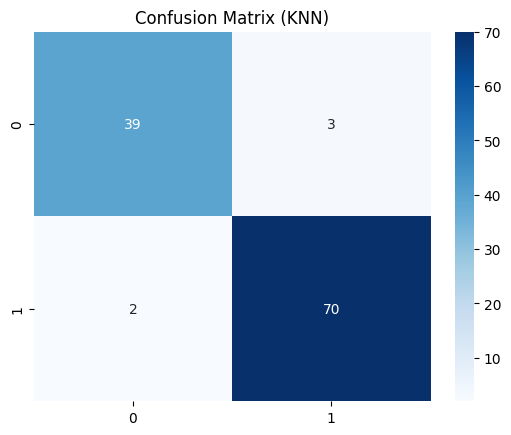

In [5]:
# Train a basic KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (KNN)")
plt.show()


## Cross-Validation & Hyperparameter Tuning

- Hyperparameter = number of neighbors (k).
- Bias-variance trade-off:
    - Low k → flexible, low bias, high variance (overfit).
    - High k → rigid, high bias, low variance (underfit).

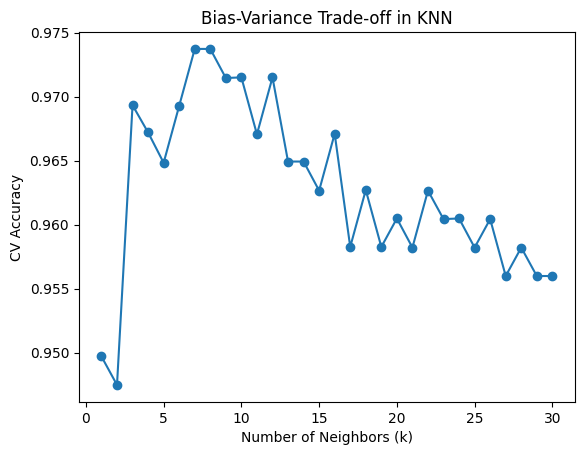

Best k: 7
Tuned Accuracy: 0.9736842105263158


In [6]:
# Cross-validation to find the best k
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring="accuracy")
    cv_scores.append(scores.mean())

# Plot CV results
plt.plot(k_values, cv_scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("CV Accuracy")
plt.title("Bias-Variance Trade-off in KNN")
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)

# Train with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))

## Grid Search

In [7]:
param_grid = {
    "n_neighbors": np.arange(1, 30),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'metric': 'euclidean', 'n_neighbors': np.int64(8), 'weights': 'uniform'}
Best Score: 0.9714285714285715


## ROC & AUC

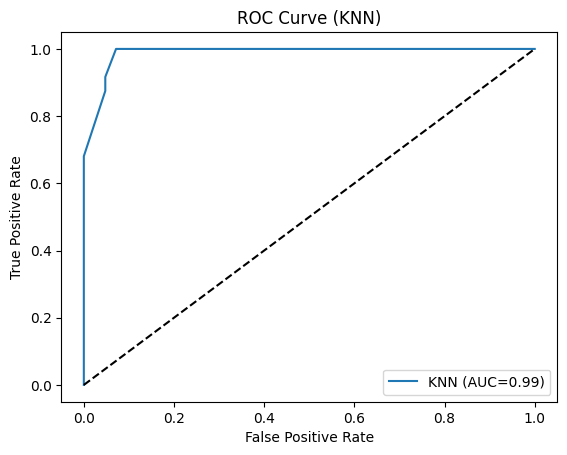

In [8]:
y_prob = best_knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"KNN (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (KNN)")
plt.legend()
plt.show()


## Bias-Variance Trade off

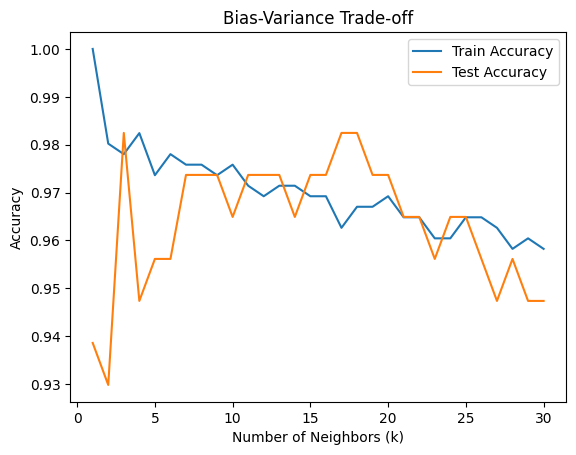

In [9]:
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_acc.append(knn.score(X_train_scaled, y_train))
    test_acc.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, train_acc, label="Train Accuracy")
plt.plot(k_values, test_acc, label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Trade-off")
plt.legend()
plt.show()


In [10]:
import joblib

# Save best model from GridSearch
best_model = grid.best_estimator_
best_model

,n_neighbors,np.int64(8)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [11]:
joblib.dump(best_model, "knn_best_model.pkl")
print("Best KNN model saved as knn_best_model.pkl")

Best KNN model saved as knn_best_model.pkl


In [12]:
# Load model back
loaded_model = joblib.load("knn_best_model.pkl")

# Confirm it's working
y_loaded_pred = loaded_model.predict(X_test_scaled)
print("Loaded Model Accuracy:", accuracy_score(y_test, y_loaded_pred))

Loaded Model Accuracy: 0.9736842105263158
